### 1. 环境准备

In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

### 2. 数据加载



In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
print(churn_df.shape)
# 从28列中仅取其中8列
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int') #float转int

(200, 28)


In [15]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard']])
print(X.shape)
print(X[0:3])
y = np.asarray(churn_df['churn'])

(200, 8)
[[ 11.  33.   7. 136.   5.   5.   0.   1.]
 [ 33.  33.  12.  33.   2.   0.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.   0.]]


In [16]:
X_norm = StandardScaler().fit_transform(X)
print(X_norm[0:3])

[[-1.13518441 -0.62595491 -0.4588971   0.4751423   1.6961288  -0.58477841
  -0.85972695  0.64686916]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.6433592  -1.14437497
  -0.85972695 -1.54590766]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -1.42318853 -0.92053635
  -0.85972695 -1.54590766]]


In [17]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

### 3. 模型训练

In [18]:
LR = LogisticRegression().fit(X_train,y_train)

In [19]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [20]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10] # 返回预测的概率

array([[0.77047565, 0.22952435],
       [0.93543984, 0.06456016],
       [0.75062776, 0.24937224],
       [0.94883131, 0.05116869],
       [0.77117014, 0.22882986],
       [0.80793559, 0.19206441],
       [0.67970438, 0.32029562],
       [0.91850805, 0.08149195],
       [0.20574314, 0.79425686],
       [0.95243863, 0.04756137]])

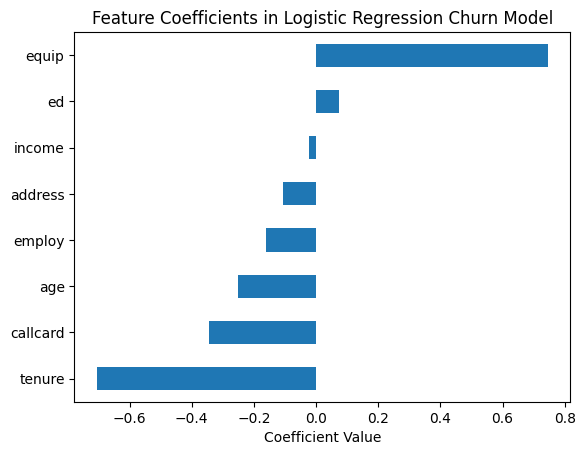

In [21]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

### 4. 模型评估

In [22]:
log_loss(y_test, yhat_prob)

0.6039104035600186